In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/new_data.zip'
extract_path = '/content/new_data'  # Adjust the extract path as needed

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow matplotlib opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('new_data/new_data')

Found 42000 files belonging to 35 classes.


In [ ]:
class_names = data.class_names
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

# Print the class names and their indices
for class_name in class_names:
    print(f"Class name: {class_name}, Index: {class_indices[class_name]}")

Class name: 1, Index: 0
Class name: 2, Index: 1
Class name: 3, Index: 2
Class name: 4, Index: 3
Class name: 5, Index: 4
Class name: 6, Index: 5
Class name: 7, Index: 6
Class name: 8, Index: 7
Class name: 9, Index: 8
Class name: A, Index: 9
Class name: B, Index: 10
Class name: C, Index: 11
Class name: D, Index: 12
Class name: E, Index: 13
Class name: F, Index: 14
Class name: G, Index: 15
Class name: H, Index: 16
Class name: I, Index: 17
Class name: J, Index: 18
Class name: K, Index: 19
Class name: L, Index: 20
Class name: M, Index: 21
Class name: N, Index: 22
Class name: O, Index: 23
Class name: P, Index: 24
Class name: Q, Index: 25
Class name: R, Index: 26
Class name: S, Index: 27
Class name: T, Index: 28
Class name: U, Index: 29
Class name: V, Index: 30
Class name: W, Index: 31
Class name: X, Index: 32
Class name: Y, Index: 33
Class name: Z, Index: 34


In [ ]:
data_iterator = data.as_numpy_iterator()

Length of batch is 2 because each batch has 2 identifiers which are the images themselves and the labels.

In [ ]:
batch = data_iterator.next()
len(batch)

2

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([15, 19, 22, 15, 16, 31,  1, 33, 19,  6,  6, 33, 11, 29, 15, 32,  3,
       30,  0, 10, 32, 18, 27,  3, 19, 17,  2, 34,  9, 23,  5,  1],
      dtype=int32)

In [ ]:
import matplotlib.pyplot as plt

We have to scale the dataset because optimization is faster when the values to be used in training the DL model are small.

In [ ]:
# scaled = batch[0]/255

In [ ]:
# scaled.max()

Instead of individually scaling each and every batch, we can map the scaling function to the data pipeline itself.

In [ ]:
# data=data.map(lambda x, y: (x/ 255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [ ]:
len(data)

1313

In [ ]:
train_size + val_size + test_size

1313

In [ ]:
train_set = data.take(train_size)
val_set = data.skip(train_size).take(val_size)
test_set = data.skip(train_size + val_size).take(test_size)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
num_classes = 35  # Total number of classes

In [ ]:
model = Sequential(layers=(
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax'))
)

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train_set, epochs=10, validation_data=val_set, callbacks=[tensorboard_callback])

In [ ]:
hist.history

{'loss': [0.6361166834831238,
  1.061643888533581e-05,
  2.0295883587095886e-06,
  1.0778587693494046e-06,
  6.007384172335151e-07,
  3.5090189953734807e-07,
  2.1133843119969242e-07,
  1.313248247925003e-07,
  8.167636167399905e-08,
  5.102702615999988e-08],
 'accuracy': [0.9826237559318542, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [3.1840489100432023e-05,
  4.501296189118875e-06,
  2.246593567178934e-06,
  1.2809239251510007e-06,
  7.835015480850416e-07,
  4.899413852399448e-07,
  3.255837555116159e-07,
  2.1891996482281684e-07,
  1.4708945172969834e-07,
  9.789407329208188e-08],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

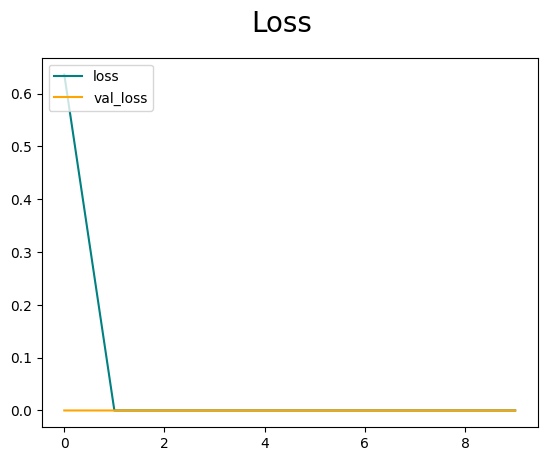

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
results = model.evaluate(test_set)

132/132 [==============================] - 77s 387ms/step - loss: 3.5949e-07 - accuracy: 1.0000


In [ ]:
print(results)

[3.5948886534242774e-07, 1.0]


In [ ]:
model.save(os.path.join('models','sign_classifier1.h5'))